# Import Required Libraries

In [1]:
#import important packages
import pandas as pd
import os
import re
import string
import nltk
from nltk.corpus import stopwords
pd.set_option('display.max_colwidth',100)

# Import the dataset

In [2]:
#Check working directory
os.getcwd()

'C:\\Users\\admin'

In [3]:
# set your working directory
os.chdir(r'C:\Users\admin\Downloads\Course_Content\Employable_NLP_Content\NLP_Class3')

In [4]:
data = pd.read_csv("SMSSpamCollection.tsv", sep='\t', header=None)
data.columns = ['label', 'body_text']

data.head()

,label,body_text
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
2,ham,"Nah I don't think he goes to usf, he lives around here though"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [5]:
# Check the dimension of data
print("Number of rows in data =",data.shape[0])
print("Number of columns in data =",data.shape[1])

Number of rows in data = 5567
Number of columns in data = 2


# Pre-processing text data
Cleaning up the text data is necessary to highlight attributes that you're going to want your machine learning system to pick up on. Cleaning (or pre-processing) the data typically consists of a number of steps:

Remove punctuation
Tokenization
Remove stopwords
Lemmatize/Stem
The first three steps are covered in this chapter as they're implemented in pretty much any text cleaning pipeline. Lemmatizing and stemming are covered in the next chapter as they're helpful but not critical.

#### Check for missing value

In [6]:
# Check for NaN values:
data.isnull().sum()

label        0
body_text    0
dtype: int64

In [7]:
data['label'].value_counts()

ham     4821
spam     746
Name: label, dtype: int64

We see that 4825 out of 5572 messages, or 86.6%, are ham.
This means that any machine learning model we create has to perform better than 86.6% to beat random chance

# Remove Punctuation

In [8]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [9]:
def remove_punct(text):
    text_nopunct = "".join([char for char in text if char not in string.punctuation])
    return text_nopunct

data['body_text_clean'] = data['body_text'].apply(lambda x: remove_punct(x))

data.head()

,label,body_text,body_text_clean
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,Ive been searching for the right words to thank you for this breather I promise i wont take your...
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...
2,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,Even my brother is not like to speak with me They treat me like aids patent
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL


# Tokenization

In [10]:
import re

def tokenize(text):
    tokens = re.split('\W+', text)
    return tokens

data['body_text_tokenized'] = data['body_text_clean'].apply(lambda x: tokenize(x.lower()))

data.head()

,label,body_text,body_text_clean,body_text_tokenized
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,Ive been searching for the right words to thank you for this breather I promise i wont take your...,"[ive, been, searching, for, the, right, words, to, thank, you, for, this, breather, i, promise, ..."
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to..."
2,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,Even my brother is not like to speak with me They treat me like aids patent,"[even, my, brother, is, not, like, to, speak, with, me, they, treat, me, like, aids, patent]"
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]"


# Remove Stopwords

In [11]:
stopword = nltk.corpus.stopwords.words('english')

In [12]:
def remove_stopwords(tokenized_list):
    text = [word for word in tokenized_list if word not in stopword]
    return text

data['body_text_nostop'] = data['body_text_tokenized'].apply(lambda x: remove_stopwords(x))

data.head()

,label,body_text,body_text_clean,body_text_tokenized,body_text_nostop
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,Ive been searching for the right words to thank you for this breather I promise i wont take your...,"[ive, been, searching, for, the, right, words, to, thank, you, for, this, breather, i, promise, ...","[ive, searching, right, words, thank, breather, promise, wont, take, help, granted, fulfil, prom..."
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv..."
2,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]","[nah, dont, think, goes, usf, lives, around, though]"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,Even my brother is not like to speak with me They treat me like aids patent,"[even, my, brother, is, not, like, to, speak, with, me, they, treat, me, like, aids, patent]","[even, brother, like, speak, treat, like, aids, patent]"
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]","[date, sunday]"


# Single function to clean up text

In [13]:
import pandas as pd
import re
import string
pd.set_option('display.max_colwidth', 100)

stopwords = nltk.corpus.stopwords.words('english')

data = pd.read_csv("SMSSpamCollection.tsv", sep='\t')
data.columns = ['label', 'body_text']

data.head()

,label,body_text
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
1,ham,"Nah I don't think he goes to usf, he lives around here though"
2,ham,Even my brother is not like to speak with me. They treat me like aids patent.
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...


In [14]:
def clean_text(text):
    text = "".join([word for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [word for word in tokens if word not in stopwords]
    return text

data['body_text_nostop'] = data['body_text'].apply(lambda x: clean_text(x.lower()))

data.head()

,label,body_text,body_text_nostop
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,"[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv..."
1,ham,"Nah I don't think he goes to usf, he lives around here though","[nah, dont, think, goes, usf, lives, around, though]"
2,ham,Even my brother is not like to speak with me. They treat me like aids patent.,"[even, brother, like, speak, treat, like, aids, patent]"
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,"[date, sunday]"
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...,"[per, request, melle, melle, oru, minnaminunginte, nurungu, vettam, set, callertune, callers, pr..."


# Stem Text

In [15]:
import nltk

ps = nltk.PorterStemmer()

In [16]:
def stemming(tokenized_text):
    text = [ps.stem(word) for word in tokenized_text]
    return text

data['body_text_stemmed'] = data['body_text_nostop'].apply(lambda x: stemming(x))

data.head()

,label,body_text,body_text_nostop,body_text_stemmed
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,"[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv...","[free, entri, 2, wkli, comp, win, fa, cup, final, tkt, 21st, may, 2005, text, fa, 87121, receiv,..."
1,ham,"Nah I don't think he goes to usf, he lives around here though","[nah, dont, think, goes, usf, lives, around, though]","[nah, dont, think, goe, usf, live, around, though]"
2,ham,Even my brother is not like to speak with me. They treat me like aids patent.,"[even, brother, like, speak, treat, like, aids, patent]","[even, brother, like, speak, treat, like, aid, patent]"
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,"[date, sunday]","[date, sunday]"
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...,"[per, request, melle, melle, oru, minnaminunginte, nurungu, vettam, set, callertune, callers, pr...","[per, request, mell, mell, oru, minnaminungint, nurungu, vettam, set, callertun, caller, press, ..."


# Vectorizing Raw Data: TF-IDF

TF-IDF
Creates a document-term matrix where the columns represent single unique terms (unigrams) but the cell represents a weighting meant to represent how important a word is to a document.

In [17]:
import pandas as pd
import re
import string
import nltk
pd.set_option('display.max_colwidth', 100)

stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

data = pd.read_csv("SMSSpamCollection.tsv", sep='\t')
data.columns = ['label', 'body_text']

In [18]:
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(analyzer=clean_text)
X_tfidf = tfidf_vect.fit_transform(data['body_text'])
print(X_tfidf.shape)
print(tfidf_vect.get_feature_names())

(5566, 8104)
['', '0', '008704050406', '0089mi', '0121', '01223585236', '01223585334', '0125698789', '02', '020603', '0207', '02070836089', '02072069400', '02073162414', '02085076972', '020903', '021', '050703', '0578', '06', '060505', '061104', '07008009200', '07046744435', '07090201529', '07090298926', '07099833605', '071104', '07123456789', '0721072', '07732584351', '07734396839', '07742676969', '07753741225', '0776xxxxxxx', '07786200117', '077xxx', '078', '07801543489', '07808', '07808247860', '07808726822', '07815296484', '07821230901', '0784987', '0789xxxxxxx', '0794674629107880867867', '0796xxxxxx', '07973788240', '07xxxxxxxxx', '0800', '08000407165', '08000776320', '08000839402', '08000930705', '08000938767', '08001950382', '08002888812', '08002986030', '08002986906', '08002988890', '08006344447', '0808', '08081263000', '08081560665', '0825', '0844', '08448350055', '08448714184', '0845', '08450542832', '08452810071', '08452810073', '08452810075over18', '0870', '08700621170150p'

Apply TfidfVectorizer to smaller sample

In [20]:
data_sample = data[0:20]

tfidf_vect_sample = TfidfVectorizer(analyzer=clean_text)
X_tfidf_sample = tfidf_vect_sample.fit_transform(data_sample['body_text'])
print(X_tfidf_sample.shape)
print(tfidf_vect_sample.get_feature_names())

(20, 192)
['08002986030', '08452810075over18', '09061701461', '1', '100', '100000', '11', '12', '150pday', '16', '2', '20000', '2005', '21st', '3', '4', '4403ldnw1a7rw18', '4txtú120', '6day', '81010', '87077', '87121', '87575', '9', '900', 'aft', 'aid', 'alreadi', 'alright', 'anymor', 'appli', 'ard', 'around', 'b', 'brother', 'call', 'caller', 'callertun', 'camera', 'cash', 'chanc', 'claim', 'click', 'co', 'code', 'colour', 'comin', 'comp', 'copi', 'cost', 'credit', 'cri', 'csh11', 'cup', 'custom', 'da', 'date', 'dont', 'eg', 'eh', 'england', 'enough', 'entitl', 'entri', 'even', 'fa', 'feel', 'ffffffffff', 'final', 'fine', 'finish', 'first', 'free', 'friend', 'go', 'goalsteam', 'goe', 'gonna', 'gota', 'ha', 'hl', 'home', 'hour', 'httpwap', 'im', 'info', 'ive', 'jackpot', 'joke', 'k', 'kim', 'kl341', 'lar', 'latest', 'lccltd', 'like', 'link', 'live', 'lor', 'lunch', 'macedonia', 'make', 'may', 'meet', 'mell', 'membership', 'messag', 'minnaminungint', 'miss', 'mobil', 'month', 'nah', 'na

### Vectorizers output sparse matrices¶
##### Sparse Matrix:
A matrix in which most entries are 0. In the interest of efficient storage, a sparse matrix will be stored by only storing the locations of the non-zero elements.

In [21]:
X_tfidf_df = pd.DataFrame(X_tfidf_sample.toarray())
X_tfidf_df.columns = tfidf_vect_sample.get_feature_names()
X_tfidf_df

,08002986030,08452810075over18,09061701461,1,100,100000,11,12,150pday,16,...,wet,win,winner,wkli,word,wwwdbuknet,xxxmobilemovieclub,xxxmobilemovieclubcomnqjkgighjjgcbl,ye,ü
0,0.000000,0.198986,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.174912,0.000000,0.198986,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.231645,0.000000,0.000000,0.000000,0.000000,0.231645,0.000000,0.000000,...,0.000000,0.000000,0.231645,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.197682,0.000000,0.000000,0.000000,0.000000,0.000000,0.197682,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.224905,0.000000,0.000000,0.000000,0.224905,0.197695,...,0.000000,0.197695,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.252972,0.000000,0.252972,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.252972,0.252972,0.000000,0.000000,0.000000,0.000000


## Feature Engineering: Transformations

In [22]:
import pandas as pd

data = pd.read_csv("SMSSpamCollection.tsv", sep='\t')
data.columns = ['label', 'body_text']

### Create the two new features

In [23]:
import string

def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100

data['body_len'] = data['body_text'].apply(lambda x: len(x) - x.count(" "))
data['punct%'] = data['body_text'].apply(lambda x: count_punct(x))
data.head()

,label,body_text,body_len,punct%
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,128,4.7
1,ham,"Nah I don't think he goes to usf, he lives around here though",49,4.1
2,ham,Even my brother is not like to speak with me. They treat me like aids patent.,62,3.2
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28,7.1
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...,135,4.4


### Plot the two new features

In [24]:
from matplotlib import pyplot
import numpy as np
%matplotlib inline

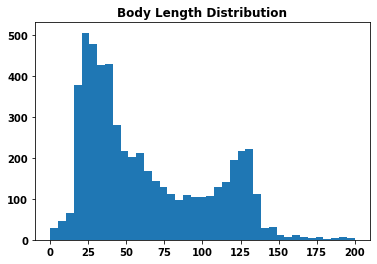

In [25]:
bins = np.linspace(0, 200, 40)

pyplot.hist(data['body_len'], bins)
pyplot.title("Body Length Distribution")
pyplot.show()

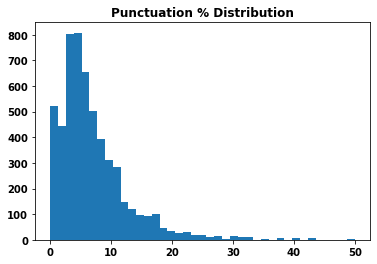

In [26]:
bins = np.linspace(0, 50, 40)

pyplot.hist(data['punct%'], bins)
pyplot.title("Punctuation % Distribution")
pyplot.show()

## Building Machine Learning Classifiers: Model selection

### Read in & clean text

In [27]:
import nltk
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import string

stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

data = pd.read_csv("SMSSpamCollection.tsv", sep='\t')
data.columns = ['label', 'body_text']

def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100

data['body_len'] = data['body_text'].apply(lambda x: len(x) - x.count(" "))
data['punct%'] = data['body_text'].apply(lambda x: count_punct(x))

def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

## Additional train/test/split arguments:
The default test size for `train_test_split` is 30%. Here we'll assign 20% of the data for testing.<br>
Also, we can set a `random_state` seed value to ensure that everyone uses the same "random" training & testing sets.

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data[['body_text', 'body_len', 'punct%']], data['label'], test_size=0.2, random_state=42)

## Build pipelines to vectorize the data, then train and fit a model
Now that we have sets to train and test, we'll develop a selection of pipelines, each with a different model.

In [29]:
tfidf_vect = TfidfVectorizer(analyzer=clean_text)
tfidf_vect_fit = tfidf_vect.fit(X_train['body_text'])

tfidf_train = tfidf_vect_fit.transform(X_train['body_text'])
tfidf_test = tfidf_vect_fit.transform(X_test['body_text'])

X_train_vect = pd.concat([X_train[['body_len', 'punct%']].reset_index(drop=True), 
           pd.DataFrame(tfidf_train.toarray())], axis=1)
X_test_vect = pd.concat([X_test[['body_len', 'punct%']].reset_index(drop=True), 
           pd.DataFrame(tfidf_test.toarray())], axis=1)

X_train_vect.head()

,body_len,punct%,0,1,2,3,4,5,6,7,...,7210,7211,7212,7213,7214,7215,7216,7217,7218,7219
0,19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,27,7.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,101,7.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,44,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Final evaluation of models

In [30]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import precision_recall_fscore_support as score
import time

In [31]:
rf = RandomForestClassifier(n_estimators=150, max_depth=None, n_jobs=-1)

start = time.time()
rf_model = rf.fit(X_train_vect, y_train)
end = time.time()
fit_time = (end - start)

start = time.time()
y_pred = rf_model.predict(X_test_vect)
end = time.time()
pred_time = (end - start)

precision, recall, fscore, train_support = score(y_test, y_pred, pos_label='spam', average='binary')
print('Fit time: {} / Predict time: {} ---- Precision: {} / Recall: {} / Accuracy: {}'.format(
    round(fit_time, 3), round(pred_time, 3), round(precision, 3), round(recall, 3), round((y_pred==y_test).sum()/len(y_pred), 3)))

Fit time: 9.912 / Predict time: 0.495 ---- Precision: 1.0 / Recall: 0.803 / Accuracy: 0.974


In [32]:
gb = GradientBoostingClassifier(n_estimators=150, max_depth=11)

start = time.time()
gb_model = gb.fit(X_train_vect, y_train)
end = time.time()
fit_time = (end - start)

start = time.time()
y_pred = gb_model.predict(X_test_vect)
end = time.time()
pred_time = (end - start)

precision, recall, fscore, train_support = score(y_test, y_pred, pos_label='spam', average='binary')
print('Fit time: {} / Predict time: {} ---- Precision: {} / Recall: {} / Accuracy: {}'.format(
    round(fit_time, 3), round(pred_time, 3), round(precision, 3), round(recall, 3), round((y_pred==y_test).sum()/len(y_pred), 3)))

Fit time: 295.767 / Predict time: 0.203 ---- Precision: 0.916 / Recall: 0.816 / Accuracy: 0.966


# Building Machine Learning Classifiers: Explore Random Forest model with grid-search

#### Grid-search: Exhaustively search all parameter combinations in a given grid to determine the best model.

In [33]:
import nltk
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import string

stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

data = pd.read_csv("SMSSpamCollection.tsv", sep='\t')
data.columns = ['label', 'body_text']

def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)

data['body_len'] = data['body_text'].apply(lambda x: len(x) - x.count(" "))
data['punct%'] = data['body_text'].apply(lambda x: count_punct(x))

def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

tfidf_vect = TfidfVectorizer(analyzer=clean_text)
X_tfidf = tfidf_vect.fit_transform(data['body_text'])

X_features = pd.concat([data['body_len'], data['punct%'], pd.DataFrame(X_tfidf.toarray())], axis=1)
X_features.head()

,body_len,punct%,0,1,2,3,4,5,6,7,...,8094,8095,8096,8097,8098,8099,8100,8101,8102,8103
0,128,0.047,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,49,0.041,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,62,0.032,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,28,0.071,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,135,0.044,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Build our own Grid-search

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_features, data['label'], test_size=0.2)

In [36]:
def train_RF(n_est, depth):
    rf = RandomForestClassifier(n_estimators=n_est, max_depth=depth, n_jobs=-1)
    rf_model = rf.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)
    precision, recall, fscore, support = score(y_test, y_pred, pos_label='spam', average='binary')
    print('Est: {} / Depth: {} ---- Precision: {} / Recall: {} / Accuracy: {}'.format(
        n_est, depth, round(precision, 3), round(recall, 3),
        round((y_pred==y_test).sum() / len(y_pred), 3)))

In [37]:
for n_est in [10, 50, 100]:
    for depth in [10, 20, 30, None]:
        train_RF(n_est, depth)

Est: 10 / Depth: 10 ---- Precision: 1.0 / Recall: 0.118 / Accuracy: 0.88
Est: 10 / Depth: 20 ---- Precision: 1.0 / Recall: 0.566 / Accuracy: 0.941
Est: 10 / Depth: 30 ---- Precision: 1.0 / Recall: 0.757 / Accuracy: 0.967
Est: 10 / Depth: None ---- Precision: 0.984 / Recall: 0.822 / Accuracy: 0.974
Est: 50 / Depth: 10 ---- Precision: 1.0 / Recall: 0.237 / Accuracy: 0.896
Est: 50 / Depth: 20 ---- Precision: 1.0 / Recall: 0.632 / Accuracy: 0.95
Est: 50 / Depth: 30 ---- Precision: 1.0 / Recall: 0.789 / Accuracy: 0.971
Est: 50 / Depth: None ---- Precision: 1.0 / Recall: 0.849 / Accuracy: 0.979
Est: 100 / Depth: 10 ---- Precision: 1.0 / Recall: 0.25 / Accuracy: 0.898
Est: 100 / Depth: 20 ---- Precision: 1.0 / Recall: 0.684 / Accuracy: 0.957
Est: 100 / Depth: 30 ---- Precision: 1.0 / Recall: 0.757 / Accuracy: 0.967
Est: 100 / Depth: None ---- Precision: 1.0 / Recall: 0.836 / Accuracy: 0.978


# Building Machine Learning Classifiers: Random Forest on a holdout test set

In [38]:
import nltk
import pandas as pd
import re
import os
from sklearn.feature_extraction.text import TfidfVectorizer
import string
os.chdir(r'D:\Analytix\python\NLP_Python')
stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

data = pd.read_csv("SMSSpamCollection.tsv", sep='\t')
data.columns = ['label', 'body_text']

def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100

data['body_len'] = data['body_text'].apply(lambda x: len(x) - x.count(" "))
data['punct%'] = data['body_text'].apply(lambda x: count_punct(x))

def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

tfidf_vect = TfidfVectorizer(analyzer=clean_text)
X_tfidf = tfidf_vect.fit_transform(data['body_text'])

X_features = pd.concat([data['body_len'], data['punct%'], pd.DataFrame(X_tfidf.toarray())], axis=1)
X_features.head()

,body_len,punct%,0,1,2,3,4,5,6,7,...,8090,8091,8092,8093,8094,8095,8096,8097,8098,8099
0,128,4.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,49,4.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,62,3.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,28,7.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,135,4.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Explore RandomForestClassifier through Holdout Set

In [39]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X_features, data['label'], test_size=0.2)

In [41]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=50, max_depth=20, n_jobs=-1)
rf_model = rf.fit(X_train, y_train)

In [42]:
sorted(zip(rf_model.feature_importances_, X_train.columns), reverse=True)[0:10]

[(0.053808475151130485, 7346),
 (0.04507703885085616, 'body_len'),
 (0.038978086253805756, 1800),
 (0.02546266780609119, 3130),
 (0.02183962800652222, 4792),
 (0.01964984339636578, 2027),
 (0.01884728240662398, 2295),
 (0.01823030974198201, 7457),
 (0.016994921897771628, 7778),
 (0.015015124216335511, 6742)]

In [43]:
y_pred = rf_model.predict(X_test)
precision, recall, fscore, support = score(y_test, y_pred, pos_label='spam', average='binary')

In [44]:
print('Precision: {} / Recall: {} / Accuracy: {}'.format(round(precision, 3),
                                                        round(recall, 3),
                                                        round((y_pred==y_test).sum() / len(y_pred),3)))

Precision: 1.0 / Recall: 0.587 / Accuracy: 0.942


In [45]:
# YOU DO NOT NEED TO RUN THIS CELL UNLESS YOU HAVE
# RECENTLY OPENED THIS NOTEBOOK OR RESTARTED THE KERNEL:

import numpy as np
import pandas as pd

df = pd.read_csv("SMSSpamCollection.tsv", sep='\t')
df.dropna(inplace=True)
blanks = []
for i,lb,rv in df.itertuples():
    if type(rv)==str:
        if rv.isspace():
            blanks.append(i)
df.drop(blanks, inplace=True)
from sklearn.model_selection import train_test_split
df.columns = ['label', 'body_text']
X = df['body_text']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn import metrics

In [46]:
# RUN THIS CELL TO ADD STOPWORDS TO THE LINEAR SVC PIPELINE:
text_clf_lsvc2 = Pipeline([('tfidf', TfidfVectorizer(stop_words=stopwords)),
                     ('clf', LinearSVC()),
])
text_clf_lsvc2.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you...
                                             'it', "it's", 'its', 'itself', ...],
                                 strip_accents=None, sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                

In [47]:
predictions = text_clf_lsvc2.predict(X_test)
print(metrics.confusion_matrix(y_test,predictions))

[[1591    3]
 [  25  218]]


In [48]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1594
        spam       0.99      0.90      0.94       243

    accuracy                           0.98      1837
   macro avg       0.99      0.95      0.97      1837
weighted avg       0.98      0.98      0.98      1837



In [49]:
print(metrics.accuracy_score(y_test,predictions))

0.9847577572128471


## Feed the training data through the second pipeline¶
Next we'll run Linear SVC

In [50]:
# Linear SVC:
text_clf_lsvc = Pipeline([('tfidf', TfidfVectorizer(stop_words=stopwords)),
                     ('clf', LinearSVC()),
])

In [51]:
text_clf_lsvc.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you...
                                             'it', "it's", 'its', 'itself', ...],
                                 strip_accents=None, sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                

In [52]:
# Form a prediction set
predictions = text_clf_lsvc.predict(X_test)

In [53]:
# Report the confusion matrix
from sklearn import metrics
print(metrics.confusion_matrix(y_test,predictions))

[[1591    3]
 [  25  218]]


In [54]:
# Print a classification report
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1594
        spam       0.99      0.90      0.94       243

    accuracy                           0.98      1837
   macro avg       0.99      0.95      0.97      1837
weighted avg       0.98      0.98      0.98      1837



In [55]:
# Print the overall accuracy
print(metrics.accuracy_score(y_test,predictions))

0.9847577572128471
